In [268]:
import re
import os
import fnmatch
from datetime import datetime,timedelta
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from collections import Counter,defaultdict
%matplotlib inline  

In [269]:
ips = []
messy_dates = []
url = []
ua1 = []
ua2 = []
code = []
for file in os.listdir('./log_files'):
    if fnmatch.fnmatch(file, 'access.log.*'):
        for line in open('./log_files/'+file, 'r'):
            clean_line = line.replace('"',',').replace('- -', ',')
            data_array = filter(None, re.split("[,]+", clean_line))
            info_within_parenthesis = re.findall(r'\([^()]*\)', data_array[6])
            if (info_within_parenthesis!=[]):
                splitted_info = re.split(";", info_within_parenthesis[0])
                ua1.append(splitted_info[0].replace("(",""))
                ua2.append(splitted_info[1].replace(")",""))
            else:
                ua1.append('-')
                ua2.append('-')
            ips.append(data_array[0])
            messy_dates.append(data_array[1].replace("[", "").replace("]", "").replace(" ", ""))
            if data_array[3][0:4] == '%20T':
                code.append(int(data_array[4][0:4]))
                url.append(data_array[5])
            else:
                code.append(int(data_array[3][0:4]))
                url.append(data_array[4])

In [270]:
all_time_zones = []
for date in messy_dates:
    all_time_zones.append(date[-5:])
print np.unique(all_time_zones)

['+0100' '+0200']


In [271]:
def to_gmt(t):
    ret = datetime.strptime(t[0:19],'%d/%b/%Y:%H:%M:%S')
    if t[20]=='+':
        ret+=timedelta(hours=int(t[21:23]))
    elif t[18]=='-':
        ret-=timedelta(hours=int(t[21:23]))
    return ret

In [272]:
dates = []
for date in messy_dates:
    dates.append(to_gmt(date))

(array([ 4926.,     0.,     0.,   547.,     0.,     0.,   160.,     0.,
            0.,   127.]),
 array([ 200. ,  230.2,  260.4,  290.6,  320.8,  351. ,  381.2,  411.4,
         441.6,  471.8,  502. ]),
 <a list of 10 Patch objects>)

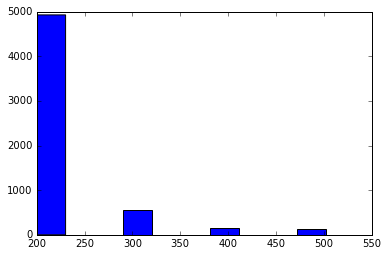

In [273]:
plt.hist(code)

(array([ 5143.,     0.,     0.,   373.,    79.,     0.,     0.,     0.,
            0.,   165.]),
 array([ 735946.53337963,  735966.43796412,  735986.34254861,
         736006.2471331 ,  736026.15171759,  736046.05630208,
         736065.96088657,  736085.86547106,  736105.77005556,
         736125.67464005,  736145.57922454]),
 <a list of 10 Patch objects>)

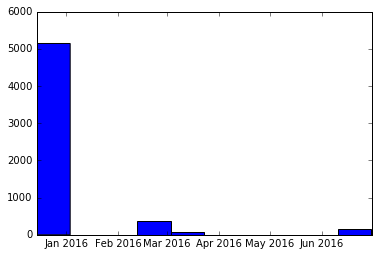

In [274]:
plt.hist(dates)

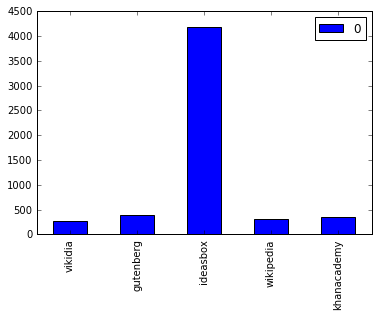

In [275]:
list_url = []
for domain in url:
    if domain != '-':
        if re.split('[/./]', domain[7:])[0]=='www':
            list_url.append(re.split('[/./]', domain[7:])[1])
        else:
            list_url.append(re.split('[/./]', domain[7:])[0])
            
url_counts = Counter(list_url)
df = pd.DataFrame.from_dict(url_counts, orient='index')
df.plot(kind='bar')

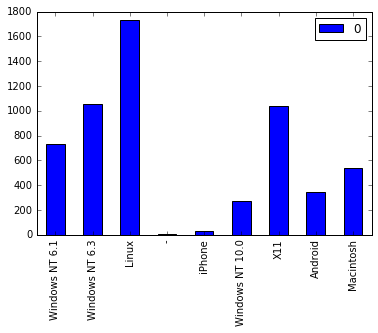

In [276]:
ua_counts = Counter(ua1)
df = pd.DataFrame.from_dict(ua_counts, orient='index')
df.plot(kind='bar')

In [277]:
ip_to_ua = defaultdict(set)

In [279]:
for i in xrange(0, len(ips)):
    ip_to_ua[ips[i]].add(ua1[i])

In [280]:
# One ip does not always correspond to one ua
ip_to_ua

defaultdict(set,
            {'192.168.2.1 ': {'X11'},
             '192.168.2.103 ': {'Linux'},
             '192.168.2.113 ': {'-', 'Windows NT 6.1'},
             '192.168.2.114 ': {'Windows NT 6.3'},
             '192.168.2.118 ': {'Linux'},
             '192.168.2.140 ': {'X11'},
             '192.168.2.143 ': {'Linux'},
             '192.168.2.144 ': {'Linux'},
             '192.168.2.171 ': {'Linux'},
             '192.168.2.172 ': {'Windows NT 10.0'},
             '192.168.2.173 ': {'Linux'},
             '192.168.2.175 ': {'Android', 'Linux'},
             '192.168.2.190 ': {'Linux'},
             '192.168.2.192 ': {'-', 'iPhone'},
             '192.168.2.199 ': {'Linux'},
             '192.168.2.201 ': {'Android'},
             '192.168.2.219 ': {'Windows NT 6.3'},
             '192.168.2.220 ': {'X11'},
             '192.168.2.221 ': {'-', 'Macintosh'},
             '192.168.2.238 ': {'Linux'},
             '192.168.2.239 ': {'Android', 'Linux'}})